In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Neuron.NeuronNetwork import Model
from fonctions.activation_function import Sigmoid, LeakyRelu, Softmax
from fonctions.loss_function import BinaryCrossEntropy, ClassificationCrossEntropy
import os

In [ ]:
OUTPUT_DIR = "output_train_data"
dict_df = {}
for dir in os.listdir(OUTPUT_DIR):
    print(f"Directory: {dir}")
    dict_df[dir] = pd.read_csv(os.path.join(OUTPUT_DIR, dir, "train_data.csv"))



Directory: layers(24_24_6_1)_lr(0.01)
Directory: layers(24_24_6_2)_lr(0.01)
Directory: layers(6_1)_lr(0.01)
Directory: layers(6_6_1)_lr(0.01)
Directory: layers(6_6_2)_lr(0.01)
Directory: layers(6_2)_lr(0.01)
Directory: layers(20_20_20_20_20_1)_lr(0.01)
Directory: layers(20_20_20_20_20_2)_lr(0.01)
Directory: layers(24_24_6_2)_lr(0.1)
Directory: layers(24_24_6_1)_lr(0.1)
Directory: layers(20_20_20_20_20_1)_lr(0.1)
Directory: layers(20_20_20_20_20_2)_lr(0.1)
Directory: layers(6_6_2)_lr(0.1)
Directory: layers(6_6_1)_lr(0.1)
Directory: layers(6_2)_lr(0.1)
Directory: layers(6_1)_lr(0.1)


In [2]:
df_train = pd.read_csv('data/train_set.csv', header=None)
shuffled_df_train = df_train

In [3]:
df_val = pd.read_csv('data/test_set.csv', header=None)
shuffled_df_val = df_val

In [4]:
X_train = shuffled_df_train.drop(columns=30)
X_train = X_train.to_numpy()
Y_train = shuffled_df_train[[30]]
Y_train = Y_train.to_numpy()

X_val = shuffled_df_val.drop(columns=30)
X_val = X_val.to_numpy()
Y_val = shuffled_df_val[[30]]
Y_val = Y_val.to_numpy()

In [5]:
Y_train

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [6]:
from preprocess.OneHotEncoder import OneHotEncoder
encoder = OneHotEncoder()

Y_train = encoder.fit_transform(Y_train)
Y_val = encoder.transform(Y_val)

In [7]:
train_set = (X_train, Y_train)
val_set = (X_val, Y_val)

In [8]:
model = Model()
model.add_layer(output_size=24, activation_function=LeakyRelu(), input_size=X_train.shape[1])
model.add_layer(output_size=24, activation_function=LeakyRelu())
model.add_layer(output_size=18, activation_function=LeakyRelu())
model.add_layer(output_size=18, activation_function=LeakyRelu())
model.add_layer(output_size=6, activation_function=LeakyRelu())
model.add_layer(output_size=2, activation_function=Softmax())
# model.add_layer(output_size=1, activation_function=Sigmoid())

In [26]:
liste = [10, 20, 30]

for i in liste[1:-1]:
    print(i)

20


In [9]:
model

Model:6 layers
Layer_0(input_size=30, output_size(neuron_count)=24, activation_function=LeakyRelu)
Layer_1(input_size=24, output_size(neuron_count)=24, activation_function=LeakyRelu)
Layer_2(input_size=24, output_size(neuron_count)=18, activation_function=LeakyRelu)
Layer_3(input_size=18, output_size(neuron_count)=18, activation_function=LeakyRelu)
Layer_4(input_size=18, output_size(neuron_count)=6, activation_function=LeakyRelu)
Layer_5(input_size=6, output_size(neuron_count)=2, activation_function=Softmax)

In [10]:
model.compile(loss_function=ClassificationCrossEntropy(), learning_rate=0.001)

In [11]:
model.train(train_set, val_set, epochs=10000, batch_size=16, verbose=True)

-- Epoch 1/10000 -- Loss_train: 0.7276 - Loss_val: 0.7154 -- Accuracy_train: 0.4322 - Accuracy_val: 0.4255 --
-- Epoch 2/10000 -- Loss_train: 0.7259 - Loss_val: 0.7140 -- Accuracy_train: 0.4439 - Accuracy_val: 0.4326 --
-- Epoch 3/10000 -- Loss_train: 0.7242 - Loss_val: 0.7126 -- Accuracy_train: 0.4533 - Accuracy_val: 0.4468 --
-- Epoch 4/10000 -- Loss_train: 0.7226 - Loss_val: 0.7113 -- Accuracy_train: 0.4579 - Accuracy_val: 0.4468 --
-- Epoch 5/10000 -- Loss_train: 0.7210 - Loss_val: 0.7100 -- Accuracy_train: 0.4603 - Accuracy_val: 0.4468 --
-- Epoch 6/10000 -- Loss_train: 0.7194 - Loss_val: 0.7088 -- Accuracy_train: 0.4579 - Accuracy_val: 0.4610 --
-- Epoch 7/10000 -- Loss_train: 0.7179 - Loss_val: 0.7075 -- Accuracy_train: 0.4626 - Accuracy_val: 0.4823 --
-- Epoch 8/10000 -- Loss_train: 0.7163 - Loss_val: 0.7063 -- Accuracy_train: 0.4696 - Accuracy_val: 0.4894 --
-- Epoch 9/10000 -- Loss_train: 0.7148 - Loss_val: 0.7051 -- Accuracy_train: 0.4696 - Accuracy_val: 0.4965 --
-- Epoch 1

In [21]:
train_loss_lst = model.train_loss_lst
val_loss_lst = model.val_loss_lst
train_accuracy_lst = model.train_accuracy_lst
val_accuracy_lst = model.val_accuracy_lst

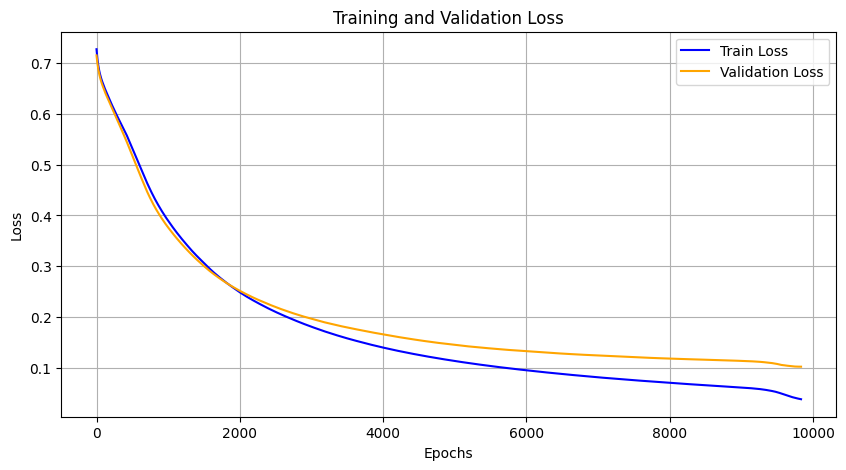

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss_lst, label='Train Loss', color='blue')
plt.plot(val_loss_lst, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

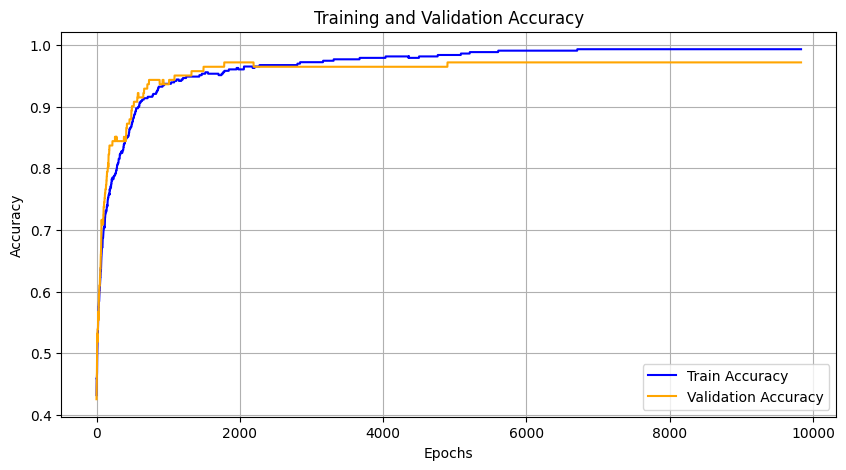

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_lst, label='Train Accuracy', color='blue')
plt.plot(val_accuracy_lst, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

In [15]:
model.save('model/model.h5')

In [16]:
model_loaded = Model.load('model/model.h5')

In [17]:
model.predict(X_val[:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
encoder.inverse_transform(Y_val[:10])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])